In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay, classification_report
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import fetch_lfw_people
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
df = fetch_lfw_people(min_faces_per_person=60)

In [3]:
df.DESCR

".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\n    http://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones and is\ni

In [4]:
df.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
df.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [6]:
type(df)

sklearn.utils._bunch.Bunch

In [7]:
df.images.shape

(1348, 62, 47)

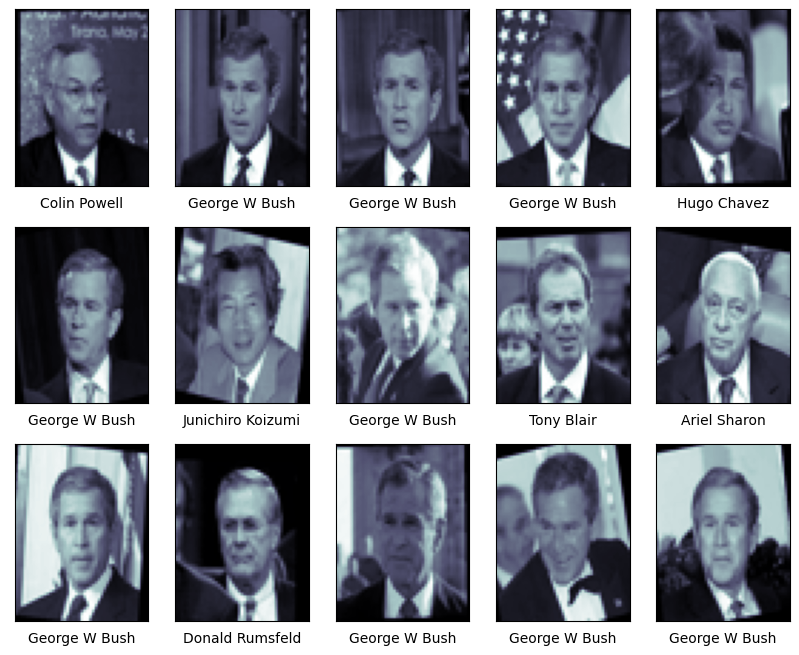

In [8]:
fig = plt.figure(figsize=(10, 8))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    plt.xlabel(df["target_names"][df['target'][i]])
    ax.imshow(df.images[i], cmap=plt.cm.bone)

Text(0.5, 0, 'George W Bush')

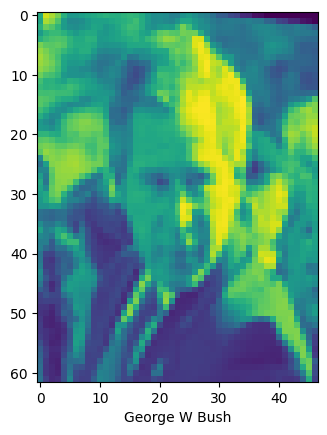

In [9]:
# fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(1, 1,1)
plt.imshow(df.images[7])
plt.xlabel(df["target_names"][df['target'][7]])

In [10]:
svc = SVC(kernel='rbf', class_weight="balanced" , probability=True)

In [11]:
n_samples, h, w = df.images.shape

In [12]:
X = df.data
n_features = X.shape[1]

In [13]:
Y = df.target
target_names = df.target_names
n_classes = target_names.shape[0]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
svc.fit(X_train, Y_train)

SVC(class_weight='balanced', probability=True)

In [17]:
Y_test_pred = svc.predict(X_test)

In [18]:
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

accuracy on test set :  0.7444444444444445


In [19]:
grid = GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=2)

In [20]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=2)

In [21]:
grid.best_estimator_

SVC(C=10, class_weight='balanced', gamma=0.0001)

In [22]:
grid.best_score_

0.8348966408268733

                   precision    recall  f1-score   support

     Ariel Sharon       0.93      0.88      0.90        16
     Colin Powell       0.87      0.85      0.86        47
  Donald Rumsfeld       0.65      0.54      0.59        24
    George W Bush       0.87      0.95      0.91       106
Gerhard Schroeder       0.88      0.64      0.74        22
      Hugo Chavez       0.72      0.93      0.81        14
Junichiro Koizumi       1.00      0.75      0.86        12
       Tony Blair       0.77      0.79      0.78        29

         accuracy                           0.84       270
        macro avg       0.84      0.79      0.81       270
     weighted avg       0.84      0.84      0.84       270



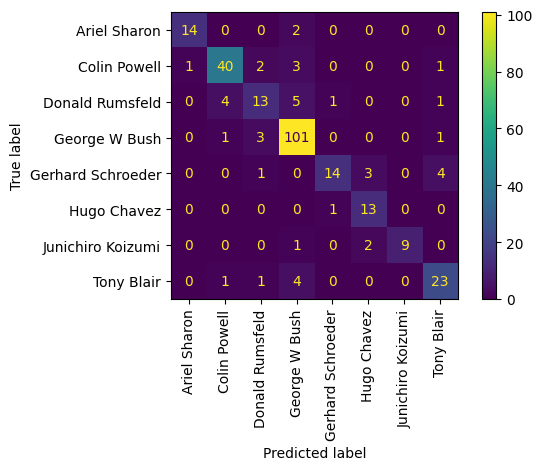

In [23]:
Y_pred = grid.predict(X_test)
print(classification_report(Y_test, Y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    grid, X_test, Y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [24]:
def plot_gallery(images, titles, h, w, n_row=4, n_col=6):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.bone)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

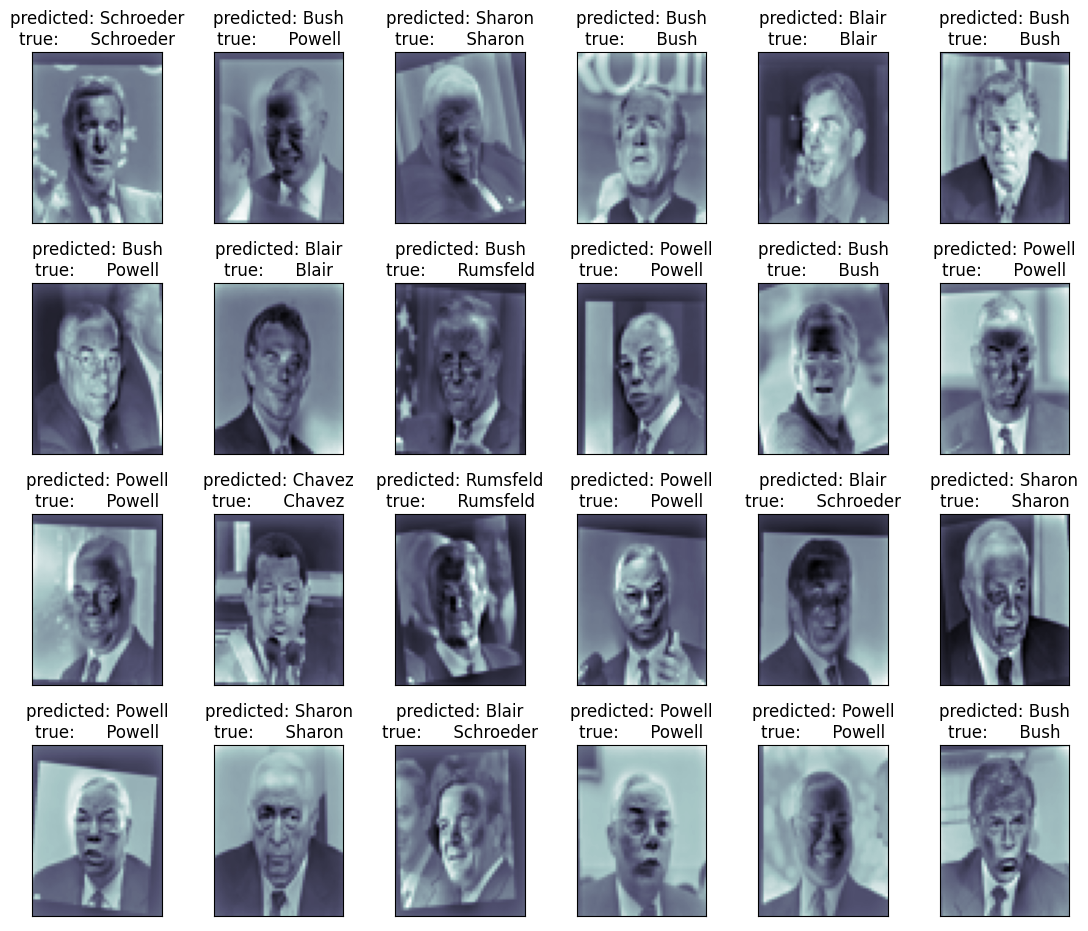

In [25]:
def title(Y_pred, y_test, target_names, i):
    pred_name = target_names[Y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(Y_pred, Y_test, target_names, i) for i in range(Y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)